# Real-Time Fingers Counter

## Performing hands landmarks detection

-  Hands Recognition & Landmarks Detection is a very interesting and important pre-processing task in many vision applications as it allows to localize and recognize the shape and motion of hands.

#### MEDIAPIPE

-  provides a robust solution capable of predicting **twenty-one 3D landmarks** 
-  Mediapipe is an open-source framework developed by Google for building real-time, cross-platform computer vision applications. It provides a collection of pre-built, customizable building blocks for processing and analyzing visual data, such as images and videos. Here are some common use cases for Mediapipe:
-  Overall, Mediapipe provides a powerful and flexible platform for developing real-time computer vision applications, without requiring extensive knowledge of computer vision algorithms or machine learning.




### Import the Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import cv2
import numpy as np
from time import time
import mediapipe as mp
import matplotlib.pyplot as plt

2023-05-12 10:04:57.369344: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Intialize the hands landmark detection model

In [3]:
# Initialize the mediapipe hands class
mp_hands= mp.solutions.hands

#set up the hands function
hands=mp_hands.Hands(static_image_mode=True,max_num_hands=2,min_detection_confidence=0.3)

# intialize the mediapipe drawing class, it will annotate the landmarks
mp_drawing=mp.solutions.drawing_utils

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


### Reading an image

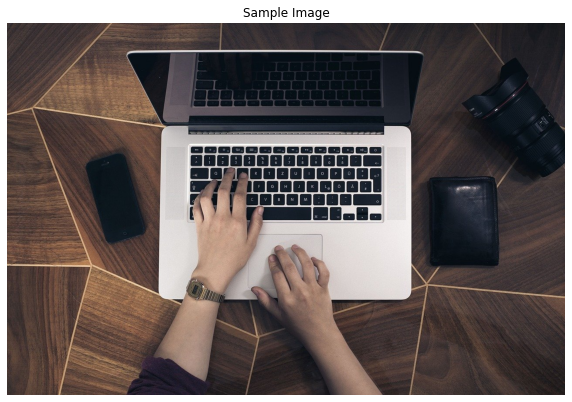

In [4]:
# Read an image from the specified path.
sample_img = cv2.imread('sample (1).jpg')

# Specify a size of the figure.
plt.figure(figsize = [10, 10])

# Display the sample image, also convert BGR to RGB for display. 
plt.title("Sample Image")
plt.axis('off')
plt.imshow(sample_img[:,:,::-1])
plt.show()

### Hand Landmark detection

In [5]:
# Perform hands landmarks detection after converting the image into RGB format.
results = hands.process(cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB))

# Check if landmarks are found.
if results.multi_hand_landmarks:
    
    # Iterate over the found hands.
    for hand_no, hand_landmarks in enumerate(results.multi_hand_landmarks):
        
        print(f'HAND NUMBER: {hand_no+1}')
        print('-----------------------')
        
        # Iterate two times as we only want to display first two landmarks of each hand.
        # we can extend them till 21 landmarks
        for i in range(2):

            # Display the found normalized landmarks.
            print(f'{mp_hands.HandLandmark(i).name}:')
            print(f'{hand_landmarks.landmark[mp_hands.HandLandmark(i).value]}') 

HAND NUMBER: 1
-----------------------
WRIST:
x: 0.3720702528953552
y: 0.6716853380203247
z: 2.3654479264223482e-07

THUMB_CMC:
x: 0.41402170062065125
y: 0.6469951272010803
z: -0.0033401609398424625

HAND NUMBER: 2
-----------------------
WRIST:
x: 0.5514993667602539
y: 0.8154111504554749
z: 2.1614465595121146e-07

THUMB_CMC:
x: 0.512658417224884
y: 0.8123655915260315
z: -0.007555139716714621



-  As you can see that the landmarks are normalized to specific scales, so now we will convert them back to their original scale by using the width and height of the sample image and display them.

In [6]:
# Retrieve the height and width of the sample image.
image_height, image_width, _ = sample_img.shape

# Check if landmarks are found.
if results.multi_hand_landmarks:
    
    # Iterate over the found hands.
    for hand_no, hand_landmarks in enumerate(results.multi_hand_landmarks):
            
        print(f'HAND NUMBER: {hand_no+1}')
        print('-----------------------')
        
        # Iterate two times as we only want to display first two landmark of each hand.
        for i in range(2):

            # Display the found landmarks after converting them into their original scale.
            print(f'{mp_hands.HandLandmark(i).name}:') 
            print(f'x: {hand_landmarks.landmark[mp_hands.HandLandmark(i).value].x * image_width}')
            print(f'y: {hand_landmarks.landmark[mp_hands.HandLandmark(i).value].y * image_height}')
            print(f'z: {hand_landmarks.landmark[mp_hands.HandLandmark(i).value].z * image_width}\n')

HAND NUMBER: 1
-----------------------
WRIST:
x: 476.2499237060547
y: 572.947593331337
z: 0.0003027773345820606

THUMB_CMC:
x: 529.9477767944336
y: 551.8868435025215
z: -4.275406002998352

HAND NUMBER: 2
-----------------------
WRIST:
x: 705.919189453125
y: 695.54571133852
z: 0.00027666515961755067

THUMB_CMC:
x: 656.2027740478516
y: 692.9478495717049
z: -9.670578837394714



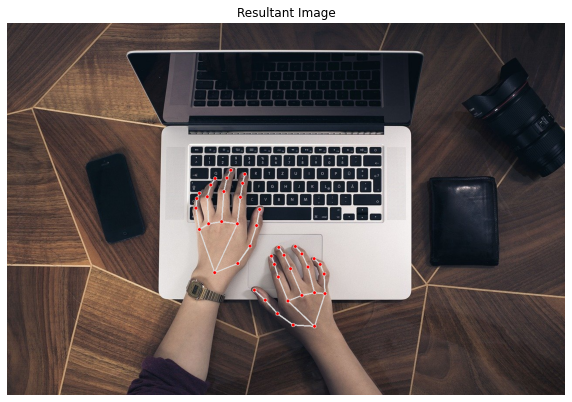

In [7]:
# Create a copy of the sample image to draw landmarks on.
img_copy = sample_img.copy()

# Check if landmarks are found.
if results.multi_hand_landmarks:
    
    # Iterate over the found hands.
    for hand_no, hand_landmarks in enumerate(results.multi_hand_landmarks):
    
        # Draw the hand landmarks on the copy of the sample image.
        # we will draw the skeleton of the hand
        mp_drawing.draw_landmarks(image = img_copy, landmark_list = hand_landmarks,
                                  connections = mp_hands.HAND_CONNECTIONS)
       
    # Specify a size of the figure.
    fig = plt.figure(figsize = [10, 10])

    # Display the resultant image with the landmarks drawn, also convert BGR to RGB for display. 
    plt.title("Resultant Image");plt.axis('off');plt.imshow(img_copy[:,:,::-1]);plt.show()

### Hands landmarks detection on real-time webcam feed

In [9]:
def detectHandsLandmarks(image, hands, draw=True, display = True):
    '''
    This function performs hands landmarks detection on an image.
    Args:
        image:   The input image with prominent hand(s) whose landmarks needs to be detected.
        hands:   The Hands function required to perform the hands landmarks detection.
        draw:    A boolean value that is if set to true the function draws hands landmarks on the output image. 
        display: A boolean value that is if set to true the function displays the original input image, and the output 
                 image with hands landmarks drawn if it was specified and returns nothing.
    Returns:
        output_image: A copy of input image with the detected hands landmarks drawn if it was specified.
        results:      The output of the hands landmarks detection on the input image.
    '''
    
    # Create a copy of the input image to draw landmarks on.
    output_image = image.copy()
    
    # Convert the image from BGR into RGB format.
    imgRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Perform the Hands Landmarks Detection.
    # this func takes care of all the processing
    results = hands.process(imgRGB)
    
    # Check if landmarks are found and are specified to be drawn.
    # this makes sure that hands are detected
    if results.multi_hand_landmarks and draw:
        
        # Iterate over the found hands.
        for hand_landmarks in results.multi_hand_landmarks:
            
            # Draw the hand landmarks on the copy of the input image.
            mp_drawing.draw_landmarks(image = output_image, landmark_list = hand_landmarks,
                                      connections = mp_hands.HAND_CONNECTIONS,
                                      landmark_drawing_spec=mp_drawing.DrawingSpec(color=(255,255,255),
                                                                                   thickness=2, circle_radius=2),
                                      connection_drawing_spec=mp_drawing.DrawingSpec(color=(0,255,0),
                                                                                     thickness=2, circle_radius=2))
    
    # Check if the original input image and the output image are specified to be displayed.
    if display:
        
        # Display the original input image and the output image.
        plt.figure(figsize=[15,15])
        plt.subplot(121);plt.imshow(image[:,:,::-1]);plt.title("Original Image");plt.axis('off');
        plt.subplot(122);plt.imshow(output_image[:,:,::-1]);plt.title("Output");plt.axis('off');
        
    # Otherwise
    else:
        
        # Return the output image and results of hands landmarks detection.
        return output_image, results              

In [10]:
# Setup Hands function for video.
hands_video = mp_hands.Hands(static_image_mode=False, max_num_hands=2,
                             min_detection_confidence=0.7, min_tracking_confidence=0.4)

# Initialize the VideoCapture object to read from the webcam.
camera_video = cv2.VideoCapture(0)
camera_video.set(3,1280)
camera_video.set(4,960)

# Create named window for resizing purposes.
cv2.namedWindow('Hands Landmarks Detection', cv2.WINDOW_NORMAL)

# Initialize a variable to store the time of the previous frame.
time1 = 0

# Iterate until the webcam is accessed successfully.
while camera_video.isOpened():
    
    # Read a frame.
    ok, frame = camera_video.read()
    
    # Check if frame is not read properly then continue to the next iteration to read the next frame.
    if not ok:
        continue
    
    # Flip the frame horizontally for natural (selfie-view) visualization.
    frame = cv2.flip(frame, 1)
    
    # Perform Hands landmarks detection.
    frame, _ = detectHandsLandmarks(frame, hands_video, display=False)
    
    # Set the time for this frame to the current time.
    time2 = time()
    
    # Check if the difference between the previous and this frame time > 0 to avoid division by zero.
    if (time2 - time1) > 0:
    
        # Calculate the number of frames per second.
        frames_per_second = 1.0 / (time2 - time1)
        
        # Write the calculated number of frames per second on the frame. 
        cv2.putText(frame, 'FPS: {}'.format(int(frames_per_second)), (10, 30),cv2.FONT_HERSHEY_PLAIN, 2, (0, 255, 0), 3)
    
    # Update the previous frame time to this frame time.
    # As this frame will become previous frame in next iteration.
    time1 = time2
    
    # Display the frame.
    cv2.imshow('Hands Landmarks Detection', frame)
    
    # Wait for 1ms. If a a key is pressed, retreive the ASCII code of the key.
    k = cv2.waitKey(1) & 0xFF    
    
    # Check if 'ESC' is pressed and break the loop.
    if(k == 27):
        break

# Release the VideoCapture Object and close the windows.                  
camera_video.release()
cv2.destroyAllWindows()

### Fingers Counter

- To check the status of each finger (i.e., either it is up or not), we will compare the y-coordinates of the `FINGER_TIP` landmark and `FINGER_PIP` landmark of each finger. Whenever the finger will be up, the y-coordinate of the `FINGER_TIP` landmark will have a lower value than the `FINGER_PIP` landmark. 

- But for the thumbs, the scenario will be a little different as we will have to compare the x-coordinates of the `THUMB_TIP` landmark and `THUMB_MCP` landmark, and the condition will vary depending upon whether the hand is left or right.

-  For the right hand, whenever the thumb will be open, the x-coordinate of the `THUMB_TIP` landmark will have a lower value than the `THUMB_MCP` landmark, and for the left hand, the x-coordinate of the `THUMB_TIP` landmark will have a greater value than the `THUMB_MCP` landmark.

-  **Note:** *You have to face the palm of your hand towards the camera.*

In [11]:
def countFingers(image, results, draw=True, display=True):
    '''
    This function will count the number of fingers up for each hand in the image.
    Args:
        image:   The image of the hands on which the fingers counting is required to be performed.
        results: The output of the hands landmarks detection performed on the image of the hands.
        draw:    A boolean value that is if set to true the function writes the total count of fingers of the hands on the
                 output image.
        display: A boolean value that is if set to true the function displays the resultant image and returns nothing.
    Returns:
        output_image:     A copy of the input image with the fingers count written, if it was specified.
        fingers_statuses: A dictionary containing the status (i.e., open or close) of each finger of both hands.
        count:            A dictionary containing the count of the fingers that are up, of both hands.
    '''
    
    # Get the height and width of the input image.
    height, width, _ = image.shape
    
    # Create a copy of the input image to write the count of fingers on.
    output_image = image.copy()
    
    # Initialize a dictionary to store the count of fingers of both hands.
    count = {'RIGHT': 0, 'LEFT': 0}
    
    # Store the indexes of the tips landmarks of each finger of a hand in a list.
    fingers_tips_ids = [mp_hands.HandLandmark.INDEX_FINGER_TIP, mp_hands.HandLandmark.MIDDLE_FINGER_TIP,
                        mp_hands.HandLandmark.RING_FINGER_TIP, mp_hands.HandLandmark.PINKY_TIP]
    
    # Initialize a dictionary to store the status (i.e., True for open and False for close) of each finger of both hands.
    fingers_statuses = {'RIGHT_THUMB': False, 'RIGHT_INDEX': False, 'RIGHT_MIDDLE': False, 'RIGHT_RING': False,
                        'RIGHT_PINKY': False, 'LEFT_THUMB': False, 'LEFT_INDEX': False, 'LEFT_MIDDLE': False,
                        'LEFT_RING': False, 'LEFT_PINKY': False}
    
    
    # Iterate over the found hands in the image.
    for hand_index, hand_info in enumerate(results.multi_handedness):
        
        # Retrieve the label of the found hand.
        # left or right
        hand_label = hand_info.classification[0].label
        
        # Retrieve the landmarks of the found hand.
        hand_landmarks =  results.multi_hand_landmarks[hand_index]
        
        # Iterate over the indexes of the tips landmarks of each finger of the hand.
        for tip_index in fingers_tips_ids:
            
            # Retrieve the label (i.e., index, middle, etc.) of the finger on which we are iterating upon.
            # u can see abve why _ is used
            finger_name = tip_index.name.split("_")[0]
            
            # Check if the finger is up by comparing the y-coordinates of the tip and pip landmarks.
             # if y s less than mid then it is true
            if (hand_landmarks.landmark[tip_index].y < hand_landmarks.landmark[tip_index - 2].y):
                
                # Update the status of the finger in the dictionary to true.
                fingers_statuses[hand_label.upper()+"_"+finger_name] = True
                
                # Increment the count of the fingers up of the hand by 1.
                count[hand_label.upper()] += 1
                
                # this is going to happen all the open fingesrs
        
        # Retrieve the y-coordinates of the tip and mcp landmarks of the thumb of the hand.
        thumb_tip_x = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_TIP].x
        thumb_mcp_x = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_TIP - 2].x
        
        # Check if the thumb is up by comparing the hand label and the x-coordinates of the retrieved landmarks.
        if (hand_label=='Right' and (thumb_tip_x < thumb_mcp_x)) or (hand_label=='Left' and (thumb_tip_x > thumb_mcp_x)):
            
            # Update the status of the thumb in the dictionary to true.
            fingers_statuses[hand_label.upper()+"_THUMB"] = True
            
            # Increment the count of the fingers up of the hand by 1.
            count[hand_label.upper()] += 1
     
    # Check if the total count of the fingers of both hands are specified to be written on the output image.
    if draw:

        # Write the total count of the fingers of both hands on the output image.
        cv2.putText(output_image, " Total Fingers: ", (10, 25),cv2.FONT_HERSHEY_COMPLEX, 1, (20,255,155), 2)
        cv2.putText(output_image, str(sum(count.values())), (width//2-150,240), cv2.FONT_HERSHEY_SIMPLEX,
                    8.9, (20,255,155), 10, 10)

    # Check if the output image is specified to be displayed.
    if display:
        
        # Display the output image.
        plt.figure(figsize=[10,10])
        plt.imshow(output_image[:,:,::-1]);plt.title("Output Image");plt.axis('off');
    
    # Otherwise
    else:

        # Return the output image, the status of each finger and the count of the fingers up of both hands.
        return output_image, fingers_statuses, count

In [14]:
# Initialize the VideoCapture object to read from the webcam.
camera_video = cv2.VideoCapture(0)
camera_video.set(3,1280)
camera_video.set(4,960)
hands_video = mp_hands.Hands(static_image_mode=False, max_num_hands=2,
                             min_detection_confidence=0.7, min_tracking_confidence=0.4)


# Create named window for resizing purposes.
cv2.namedWindow('Fingers Counter', cv2.WINDOW_NORMAL)

# Iterate until the webcam is accessed successfully.
while camera_video.isOpened():
    
    # Read a frame.
    ok, frame = camera_video.read()
    
    # Check if frame is not read properly then continue to the next iteration to read the next frame.
    if not ok:
        continue
    
    # Flip the frame horizontally for natural (selfie-view) visualization.
    frame = cv2.flip(frame, 1)
    
    # Perform Hands landmarks detection on the frame.
    frame, results = detectHandsLandmarks(frame, hands_video, display=False)
    
    # Check if the hands landmarks in the frame are detected.
    if results.multi_hand_landmarks:
            
        # Count the number of fingers up of each hand in the frame.
        frame, fingers_statuses, count = countFingers(frame, results, display=False)
                
    # Display the frame.
    cv2.imshow('Fingers Counter', frame)
    
    # Wait for 1ms. If a key is pressed, retreive the ASCII code of the key.
    k = cv2.waitKey(1) & 0xFF
    
    # Check if 'ESC' is pressed and break the loop.
    if(k == 27):
        break

# Release the VideoCapture Object and close the windows.
camera_video.release()
cv2.destroyAllWindows()

-  Now we will utilize the function **`countFingers()`** created above on a real-time webcam feed to count the number of fingers in the frame.

-  Super! the fingers are being counted really fast.